In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Final WM Data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Brand,Model,Rating,FType,Load,WashingCapacity,WashingMethod,SpinSpeed,Built_In_Heater,Dryer,EnergyRating,Price
0,0,SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...,SAMSUNG,WW60R20GLMA/TL,4.4,Fully Automatic,Front Load,6.0,Tumble,1000,Yes,Air Turbo Drying System,5.0,22399
1,1,"Candes 6.5 kg Semi Automatic Top Load Red, Whi...",Candes,CTPL65PLSWM,4.8,Semi Automatic,Top Load,6.5,Pulsator,1500,No,Spin Dryer,5.0,6799
2,2,SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...,SAMSUNG,WA65A4002VS/TL,4.4,Fully Automatic,Top Load,6.5,Pulsator,680,No,Air Turbo Drying System,3.0,14499
3,3,SAMSUNG 7.2 kg with Double Storm Technology Se...,SAMSUNG,WT725QPNDMPXTL 02,4.4,Semi Automatic,Top Load,7.2,Centre Jet Pulsator Wash,740,No,Air Turbo Drying System,3.0,9699
4,4,"Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...",Whirlpool,SUPERB ATOM 70S GREY DAZZLE (5YR),4.4,Semi Automatic,Top Load,7.0,Impellar Wash,1450,No,Spin Dry,5.0,10240


In [4]:
df['EnergyRating'].value_counts()

5.0    398
3.0    349
4.0      5
Name: EnergyRating, dtype: int64

In [5]:
df.drop(['Unnamed: 0','Name','Model'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            752 non-null    object 
 1   Rating           752 non-null    float64
 2   FType            752 non-null    object 
 3   Load             752 non-null    object 
 4   WashingCapacity  752 non-null    float64
 5   WashingMethod    752 non-null    object 
 6   SpinSpeed        752 non-null    int64  
 7   Built_In_Heater  752 non-null    object 
 8   Dryer            752 non-null    object 
 9   EnergyRating     752 non-null    float64
 10  Price            752 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 64.8+ KB


In [7]:
df.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Rating,WashingCapacity,SpinSpeed,EnergyRating,Price
count,752.000000,752.000000,752.000000,752.00000,752.000000
mean,4.070080,7.477261,1056.876330,4.06516,20525.678191
std,0.548253,1.327935,305.027548,0.99520,11270.951178
min,1.000000,3.000000,300.000000,3.00000,4990.000000
25%,4.000000,6.500000,740.000000,3.00000,12797.500000
50%,4.300000,7.000000,1000.000000,5.00000,16897.000000
75%,4.400000,8.000000,1350.000000,5.00000,26569.000000
90%,4.500000,9.000000,1400.000000,5.00000,34987.100000
95%,4.600000,10.200000,1450.000000,5.00000,39990.000000
99%,4.949000,11.000000,1500.000000,5.00000,64948.510000


<AxesSubplot:xlabel='Price', ylabel='Count'>

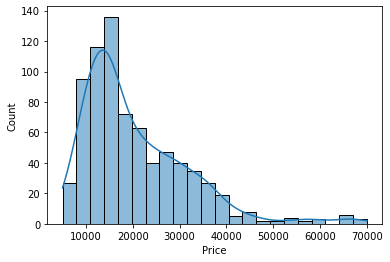

In [8]:
sns.histplot(x=df['Price'],kde=True)

In [9]:
data = pd.get_dummies(df, columns=['Brand','FType','Load','WashingMethod','Built_In_Heater','Dryer'],drop_first=True)

In [10]:
data.head()

,Rating,WashingCapacity,SpinSpeed,EnergyRating,Price,Brand_Akai,Brand_Avoir,Brand_BOSCH,Brand_BPL,Brand_CANDY,...,Dryer_Plastic Spin Dryer,Dryer_Spin,Dryer_Spin Air Dry,Dryer_Spin Dry,Dryer_Spin Dryer,Dryer_Stainless Steel Spin Dryer,Dryer_Swift Dry,Dryer_Turbo Air Dry,Dryer_Turbo Dry,Dryer_Wind Jet Dry
0,4.4,6.0,1000,5.0,22399,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.8,6.5,1500,5.0,6799,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.4,6.5,680,3.0,14499,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.4,7.2,740,3.0,9699,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.4,7.0,1450,5.0,10240,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
x = data.drop("Price", axis=1)
y= data["Price"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=65)

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [14]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [15]:
df2

,Actual,Predicted
414,8799,7689.948841
220,30990,32238.767667
83,13900,13900.000000
477,11099,9858.115640
735,36416,51514.531641
...,...,...
148,24390,26108.521372
5,16740,21005.512203
596,12790,17878.239560
454,38199,28259.336986


In [16]:
print("Training Score : ",lr.score(x_train,y_train))
print("Testing Score : ",lr.score(x_test,y_test))

Training Score :  0.937707757501494
Testing Score :  0.8125855239212154


In [17]:
from sklearn.metrics import r2_score,mean_squared_error
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("R2score=",score)
print("MSE=",mse)

R2score= 0.8125855239212154
MSE= 23115984.161944695


In [18]:
lr.coef_

array([-1.47048257e+03,  2.97962559e+03,  5.78382333e+00,  1.23149430e+02,
        3.68779341e+03,  7.28103942e-08,  6.37944566e+03,  6.85717947e+03,
        4.02729977e+03, -1.47224377e+02,  2.31433116e+03,  1.15406016e+04,
       -9.73848362e+01, -2.54403126e+03,  5.12363962e+03, -2.05506100e+03,
        3.48215047e+03,  2.09747748e+04,  3.09365626e+03,  7.90502052e+03,
        1.64810404e+03,  2.42193420e+03,  7.26338874e+03, -9.24046617e-09,
        5.22660852e+03,  5.96692382e+03,  2.79557537e+02, -1.57746732e+03,
       -1.54910002e+03,  1.39019705e+03,  3.92250206e+03,  2.98372485e+03,
        1.10573871e+03, -3.64936728e+02,  5.60593787e+03, -3.82680028e+03,
        7.10960801e+03, -3.68914452e+02,  2.84238029e+03,  2.46106976e+03,
        1.37529942e+03, -3.90775518e+03, -1.22518292e+04, -1.45961450e+04,
        2.52294226e+04, -8.73647485e+03,  1.06256360e+04,  5.66161154e+03,
        1.24734678e+04,  6.41985266e+03,  7.85803422e-10,  1.63122277e+03,
        3.98811294e+03,  

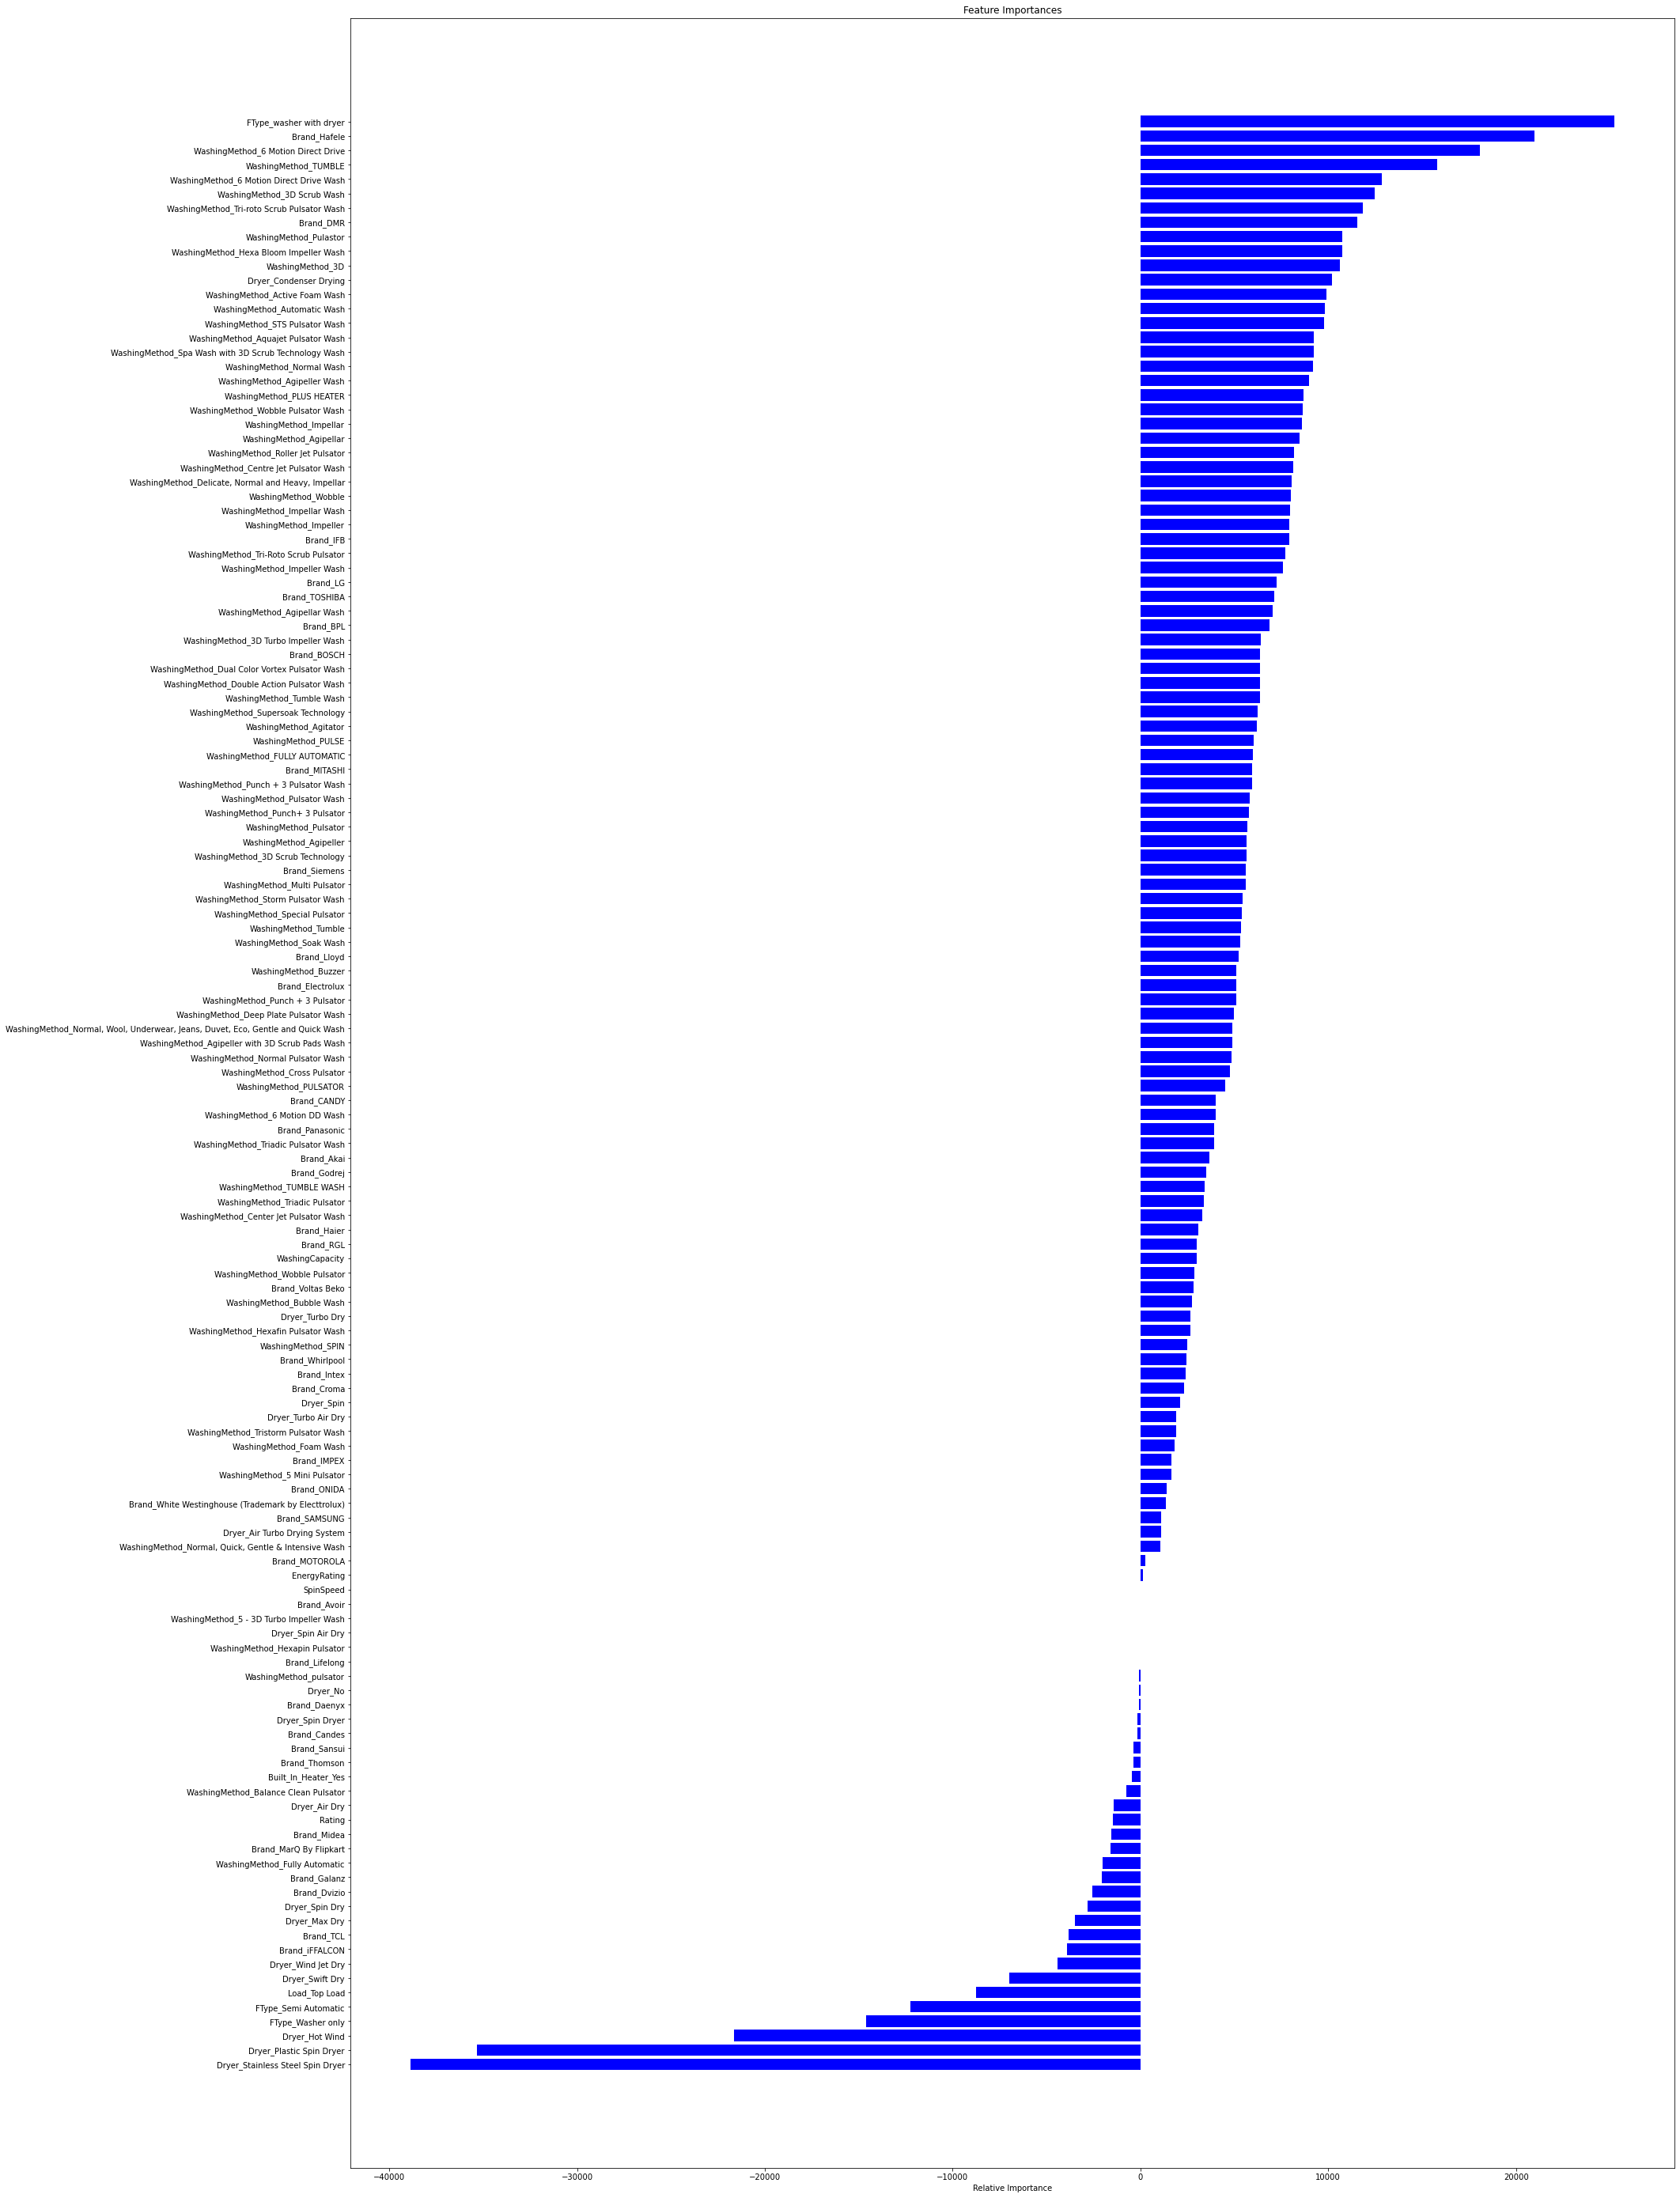

In [19]:
features = x_train.columns
importances = lr.coef_
indices = np.argsort(importances)
plt.figure(figsize=(30, 50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Ridge

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [24]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
0.8821869799093122


In [25]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013967,0.005637,0.006257,0.003141,0.001,{'alpha': 0.001},0.805456,0.873086,0.902353,0.878297,...,0.845825,0.049764,22,0.935762,0.939245,0.937824,0.942897,0.946977,0.940541,0.003972
1,0.010332,0.003193,0.006470,0.004499,0.001,{'alpha': 0.001},0.805456,0.873086,0.902353,0.878297,...,0.845825,0.049764,22,0.935762,0.939245,0.937824,0.942897,0.946977,0.940541,0.003972
2,0.008508,0.003045,0.001599,0.003197,0.01,{'alpha': 0.01},0.815598,0.882966,0.903104,0.885242,...,0.854587,0.045431,20,0.935656,0.939104,0.937780,0.942773,0.946858,0.940434,0.003960
3,0.008121,0.003165,0.002015,0.003119,0.05,{'alpha': 0.05},0.836958,0.890588,0.904187,0.884638,...,0.865160,0.035917,16,0.935168,0.938520,0.937218,0.942138,0.946259,0.939861,0.003922
4,0.006027,0.003355,0.004829,0.004329,0.1,{'alpha': 0.1},0.851476,0.892055,0.903938,0.880468,...,0.870023,0.029591,13,0.934629,0.937898,0.936339,0.941483,0.945597,0.939189,0.003922
5,0.009745,0.000997,0.004049,0.004958,0.2,{'alpha': 0.2},0.868128,0.892558,0.902379,0.874603,...,0.874836,0.022744,11,0.933479,0.936550,0.934616,0.940323,0.944239,0.937841,0.003955
6,0.007903,0.003017,0.005481,0.003465,0.3,{'alpha': 0.3},0.878148,0.892362,0.900539,0.870785,...,0.877461,0.019095,9,0.932236,0.935134,0.933011,0.939221,0.942794,0.936479,0.003981
7,0.008282,0.003145,0.002215,0.003003,0.4,{'alpha': 0.4},0.885060,0.891947,0.898696,0.868027,...,0.879133,0.017002,8,0.930951,0.933728,0.931515,0.938139,0.941301,0.935127,0.003991
8,0.006836,0.003933,0.004431,0.003904,0.5,{'alpha': 0.5},0.890164,0.891436,0.896913,0.865885,...,0.880258,0.015830,7,0.929657,0.932364,0.930109,0.937072,0.939795,0.933799,0.003987
9,0.008465,0.001551,0.004054,0.003361,0.6,{'alpha': 0.6},0.894094,0.890872,0.895200,0.864134,...,0.881029,0.015240,5,0.928374,0.931048,0.928779,0.936022,0.938298,0.932504,0.003975


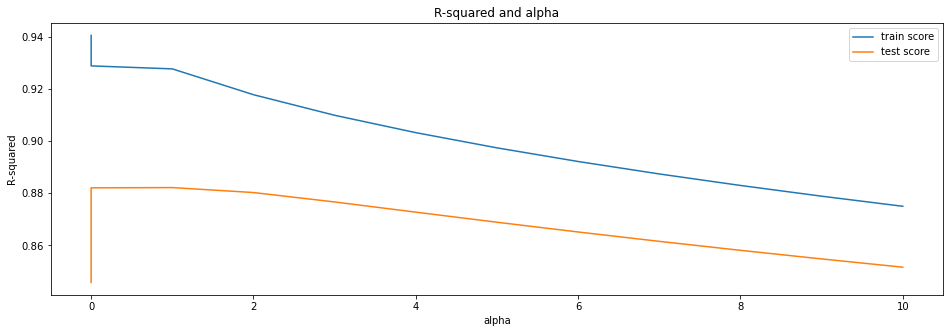

In [26]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("R-squared and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [27]:
params = {'alpha' : [1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9]},
             return_train_score=True, scoring='r2', verbose=1)

In [28]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.1}
0.8821961805957332


In [29]:
alpha =1.1
ridge = Ridge(alpha=alpha)

ridge.fit(x_train,y_train)
coef_ridge_RS=ridge.coef_
coef_ridge_RS

array([-1.66082073e+03,  2.96871582e+03,  6.89070796e+00,  3.09203514e+01,
        2.88793077e+02,  0.00000000e+00,  3.74378577e+03,  1.87053431e+03,
       -1.73760587e+03,  7.36769822e+02, -4.00952300e+02, -1.05594526e+03,
       -2.87577327e+03, -2.74741542e+03,  2.10548690e+02, -4.60739813e+03,
        8.27959207e+02,  1.27303277e+04,  2.36283362e+02,  5.37050773e+03,
        2.07853440e+03, -9.97248816e+01,  4.89202317e+03,  0.00000000e+00,
        1.99753367e+03, -1.74862812e+02, -1.75031450e+03, -4.27301084e+03,
       -3.44456454e+03, -1.88348902e+03,  1.24255055e+03,  2.58076960e+02,
        2.24391038e+03, -2.47524977e+03,  2.70920342e+03, -4.72665817e+03,
        3.36777984e+03, -2.65415261e+03, -7.12334525e+02, -5.90464652e+01,
       -7.74668547e+02, -2.64588790e+03, -1.25767288e+04, -1.06799724e+04,
        2.02193097e+04, -6.34624441e+03,  2.43642359e+03, -7.55495663e+02,
        2.30794715e+03, -6.00572220e+02,  0.00000000e+00, -3.00361273e+03,
       -1.25431385e+03,  

In [30]:
y_pred_Ridge = ridge.predict(x_test)

In [31]:

print("Training Score with final Ridge : ",ridge.score(x_train,y_train))
print("Testing Score with final Ridge : ",ridge.score(x_test,y_test))
print("R2-Score :",r2_score(y_test,y_pred_Ridge))

Training Score with final Ridge :  0.9251485200655876
Testing Score with final Ridge :  0.8404260634697555
R2-Score : 0.8404260634697555


# Lasso

In [32]:
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        n_jobs=-1,
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(x_train, y_train) 





Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [33]:
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 10.0}
0.8748169303622602


In [34]:
cv_results1 = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.192542,0.015217,0.008002,2.274868e-06,0.001,{'alpha': 0.001},0.804036,0.866171,0.902075,0.880175,...,0.843979,0.050263,22,0.935764,0.939248,0.937825,0.942899,0.946980,0.940543,0.003972
1,0.198418,0.010612,0.008001,2.214086e-06,0.001,{'alpha': 0.001},0.804036,0.866171,0.902075,0.880175,...,0.843979,0.050263,22,0.935764,0.939248,0.937825,0.942899,0.946980,0.940543,0.003972
2,0.187219,0.008159,0.009602,3.200245e-03,0.01,{'alpha': 0.01},0.804982,0.867240,0.902198,0.878576,...,0.844370,0.049580,21,0.935762,0.939246,0.937825,0.942897,0.946978,0.940541,0.003972
3,0.168018,0.007158,0.006401,3.200555e-03,0.05,{'alpha': 0.05},0.808668,0.872149,0.902488,0.884218,...,0.848741,0.048096,20,0.935728,0.939200,0.937821,0.942862,0.946939,0.940510,0.003967
4,0.185621,0.024476,0.004801,6.401348e-03,0.1,{'alpha': 0.1},0.811887,0.876622,0.902748,0.889205,...,0.852595,0.046907,19,0.935657,0.939086,0.937810,0.942769,0.946856,0.940436,0.003955
5,0.132815,0.011975,0.008001,1.600071e-06,0.2,{'alpha': 0.2},0.816324,0.880809,0.903096,0.892165,...,0.856571,0.044742,18,0.935478,0.938874,0.937776,0.942605,0.946681,0.940283,0.003942
6,0.100812,0.022965,0.008002,2.505097e-06,0.3,{'alpha': 0.3},0.818999,0.882349,0.903388,0.892835,...,0.858353,0.043492,17,0.935375,0.938731,0.937739,0.942472,0.946556,0.940174,0.003926
7,0.097609,0.015515,0.008003,1.154301e-06,0.4,{'alpha': 0.4},0.820290,0.883011,0.903594,0.892894,...,0.859328,0.042601,16,0.935312,0.938657,0.937704,0.942389,0.946464,0.940105,0.003911
8,0.080007,0.005059,0.008002,1.773937e-06,0.5,{'alpha': 0.5},0.822441,0.883652,0.903773,0.892789,...,0.860278,0.041747,15,0.935242,0.938599,0.937640,0.942310,0.946403,0.940039,0.003911
9,0.099211,0.035637,0.008001,1.360449e-06,0.6,{'alpha': 0.6},0.823757,0.884463,0.903876,0.892658,...,0.860853,0.041373,14,0.935192,0.938543,0.937576,0.942228,0.946346,0.939977,0.003908


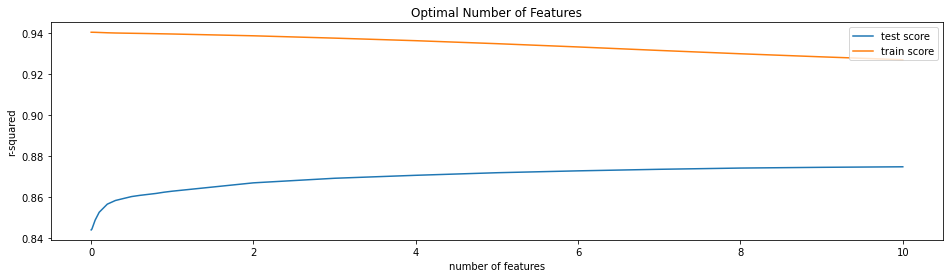

In [35]:
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [36]:
alpha = 10.0
lasso = Lasso(alpha=alpha)

lasso.fit(x_train,y_train)
coef_lasso_RS=lasso.coef_
coef_lasso_RS

array([-1.41247753e+03,  2.99064121e+03,  4.76712130e+00,  2.68823177e+01,
        0.00000000e+00,  0.00000000e+00,  3.46412843e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.26858163e+02, -0.00000000e+00,  0.00000000e+00, -4.50189849e+03,
        8.37551216e+02,  1.56555769e+04,  1.17437470e+02,  4.92221101e+03,
        0.00000000e+00,  0.00000000e+00,  5.20314242e+03,  0.00000000e+00,
        6.94064298e+02, -0.00000000e+00, -1.61377701e+03, -4.16512157e+03,
       -3.14118178e+03, -9.68422070e+02,  1.23046696e+03,  0.00000000e+00,
        2.06195276e+03, -1.25182503e+03,  1.72191335e+03, -4.51379860e+03,
        2.46878462e+03, -1.76550157e+03, -2.78592201e+02,  5.67581144e+02,
       -0.00000000e+00, -0.00000000e+00, -1.17178967e+04, -1.28754597e+04,
        2.35634153e+04, -7.82981143e+03,  1.00442061e+03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [37]:
print("Training Score with final Lasso : ",lasso.score(x_train,y_train))
print("Testing Score with final Lasso : ",lasso.score(x_test,y_test))

Training Score with final Lasso :  0.9230433321193838
Testing Score with final Lasso :  0.8292755129090685


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
m1 = RandomForestRegressor()
m1.fit(x_train,y_train)
y_p=m1.predict(x_test)

In [40]:
print("Training Score with base RF : ",m1.score(x_train,y_train))
print("Testing Score with base RF : ",m1.score(x_test,y_test))

Training Score with base RF :  0.9869827209872686
Testing Score with base RF :  0.8018865644367847


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor




params = {
    
    "n_estimators":[10,20,25,30,35,40,45,50,],
   
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [15,17,19,21,22,24,25 ]
    
}


final_model = RandomForestRegressor()
final_model= GridSearchCV(final_model, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
final_model.fit(x_train, y_train)
best_params = final_model.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 672 candidates, totalling 2016 fits
Best paramters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20})


In [43]:
final_model1=RandomForestRegressor(max_depth= 17, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 20,random_state=45)
final_model1.fit(x_train,y_train)

RandomForestRegressor(max_depth=17, n_estimators=20, random_state=45)

In [44]:
y_predict=final_model1.predict(x_test)

In [45]:
print("Training Score with final RF : ",final_model1.score(x_train,y_train))
print("Testing Score with final RF : ",final_model1.score(x_test,y_test))

Training Score with final RF :  0.9828837388650571
Testing Score with final RF :  0.8195328230270762


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor().fit(x_train, y_train)

y_gb_pred = gb.predict(x_test)


In [47]:
print("Training Score with GB : ",gb.score(x_train,y_train))
print("Testing Score with GB : ",gb.score(x_test,y_test))

Training Score with GB :  0.9581816022440002
Testing Score with GB :  0.8065609892817357
